In [1]:
# Import libraries
import torch
from torch import nn
from torch import optim
import numpy as np
import matplotlib.pyplot as plt


from MNIST_dataset import load_mnist_datasets
from MNIST_model import NeuralNetwork
from MNIST_train import train_model

torch.Size([1, 1, 28, 28])
torch.Size([1, 10])


In [2]:
# Load MNIST dataset
train_data, test_data, train_dataloader, test_dataloader = load_mnist_datasets()

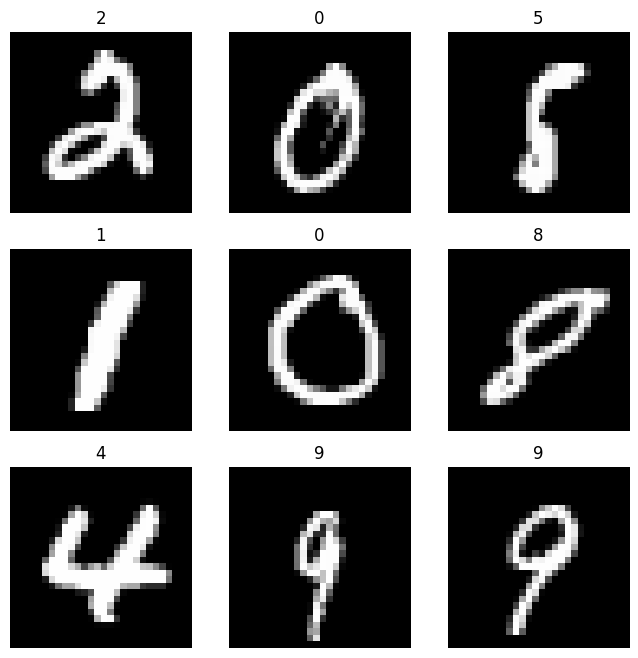

In [3]:
# Plot dataset
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [5]:
# Create model
model = NeuralNetwork()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Train model
train_model(model, train_dataloader, test_dataloader, loss_fn, optimizer, epochs=10)


Epoch 1
-------------------------------
loss: 2.307142  [    0/60000]
loss: 0.721530  [ 6400/60000]
loss: 0.431592  [12800/60000]
loss: 0.417534  [19200/60000]
loss: 0.252309  [25600/60000]
loss: 0.188236  [32000/60000]
loss: 0.149154  [38400/60000]
loss: 0.476302  [44800/60000]
loss: 0.192834  [51200/60000]
loss: 0.254853  [57600/60000]
Test Error: 
 Accuracy: 96.4%, Avg loss: 0.121788 

Epoch 2
-------------------------------
loss: 0.126521  [    0/60000]
loss: 0.229882  [ 6400/60000]
loss: 0.258457  [12800/60000]
loss: 0.264574  [19200/60000]
loss: 0.159013  [25600/60000]
loss: 0.129905  [32000/60000]
loss: 0.073752  [38400/60000]
loss: 0.171851  [44800/60000]
loss: 0.074603  [51200/60000]
loss: 0.090922  [57600/60000]
Test Error: 
 Accuracy: 97.4%, Avg loss: 0.082155 

Epoch 3
-------------------------------
loss: 0.046886  [    0/60000]
loss: 0.089351  [ 6400/60000]
loss: 0.153481  [12800/60000]
loss: 0.031365  [19200/60000]
loss: 0.059909  [25600/60000]
loss: 0.041136  [32000/600

In [8]:
image, label = test_data[0]

pred_label = model(image.unsqueeze(0)).argmax(dim=1).item()

print(label)
print(pred_label)

7
7


In [9]:
torch.save(model.state_dict(), "MNIST_model.pth")